# Connect to G-Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Notebook Default Directory

In [ ]:
import os
file_dir = "/content/drive/MyDrive/Colab Notebooks/Data Science Project 1"
os.chdir(file_dir)

In [ ]:
!ls

#untuk mengecek apakah sudah di folder yang di inginkan.

'[Cleaned]Laptop_Price.csv'  ' Laptop Price Dataset EDA.ipynb'
 Laptop_Price.csv


# Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-318-21f15e5228a1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame's Info

In [ ]:
# DataFrame shape
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

*   terdapat 3 tipe data : float, int, category (object)
*   Kesalahan pada tipe data (Ubah ke INT) : RAM, Memory, Weight, CPU
*   Kesalahan tipe data (Ubah ke Category) : Laptop_ID (karena tidak menjelaskan waktu pendaftaran dkk)
*   Tidak ada nilai NULL





## Describe Dataframe

In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

1. Laptop_ID
* Count : 1303 entries, 0 to 1302
* MAX : 1320

2. Inches
* Min : 10.1
* Max : 18.4
* Mean : 15.01

3. Price_euros
* Min : 174.0
* Max : 6099
* Mean :1123

# Data Cleaning

## Lowering DataFrame's Column Names

In [ ]:
# melihat nama kolom yang ada.

df.columns


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [ ]:
#menguabah semua kolom menjadi huruf kecil
# [colname.lower() for colname in df.columns] --> ini cara basic tidak pandas

df = df.rename(columns = str.lower)
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [ ]:
# No missing value

df.isna().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

## Check For Duplicates

In [ ]:
# memastikan agar tidak ada data yang sama
# output boolean. True and False

# df.duplicated().sum()
df.duplicated() #--->> general

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [ ]:
df[df.duplicated]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros


data tidak ada yang duplikat

# Data Cleaning + Feature Engineering (FE)

## Laptop ID

**Laptop_ID**

Count : 1303 entries, 0 to 1302

In [ ]:
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
#melakukan investigas mengenai hal ganjil pada Laptop_ID

idx = 0
for laptop_id in df['laptop_id']:
  if idx+1 != laptop_id:
    print(laptop_id)
    break
  idx += 1 #idx = idx+1

66


In [ ]:
# investigasi laptop id yang ke 66

#df[df['laptop_id'] == 64]

df.loc[df['laptop_id'] == 66, :]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
64,66,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0


In [ ]:
# menghapus ID karena tidak menjelaskan apapun, dia hanya berupa urutan.
# dengan menghapus kita hanya mengunakan ID dari sistem saja

df.drop('laptop_id', axis=1, inplace=True)

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Screen Resolution

In [ ]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

Analisa data :

1. Tipe Layar

2. Resolusi
3. Touchscreen (boolean --> Yes or No)

Action :
1. melakukan pemisahan kolom tersebut
2. membuat kolom baru

In [ ]:
# untuk tipe data string dapat melakukan str.extract

### FE on Screen Resolution

#### membuat kolom resolution

In [ ]:

# melakukannya dengan menggunakan library regex = regextranslator.com
# yang di ambil hanya angka saja.

df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['resolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: resolution, Length: 1303, dtype: object

#### membuat kolom screentype

In [ ]:

# melakukannya dengan menggunakan library regex = regextranslator.com
# yang di ambil hanya angka saja.

# ubah data yang berangka menjadi ' ' data kosong
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','', regex=True)

# ubah -->  Full HD | Quad HD
# r' tandanya regex pada pyhton
# (Full HD | Quad HD | \+ | / | 4K Ultra HD) -> melihat apakah mengandung kalimat Full HD dkk
df['screentype'] = df['screentype'].replace(r'(Full HD | Quad HD | \+ | / | 4K Ultra HD)','', regex=True)
df['screentype']

0            IPS Panel Retina Display 
1                                     
2                                     
3            IPS Panel Retina Display 
4            IPS Panel Retina Display 
                     ...              
1298          IPS Panel / Touchscreen 
1299    IPS Panel Quad HD+Touchscreen 
1300                                  
1301                                  
1302                                  
Name: screentype, Length: 1303, dtype: object

#### membuat kolom Touchcreen (Boolean)

In [ ]:
# mengeprint Nan apabila di screentype tidak ada tulisan Touchscreen

df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].replace(r'(Touchscreen)', '', regex=True)

In [ ]:
df['touchscreen']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1298    Touchscreen
1299    Touchscreen
1300            NaN
1301            NaN
1302            NaN
Name: touchscreen, Length: 1303, dtype: object

In [ ]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [ ]:
# mengubah jika ada Touchscreen = 1 , NaN = 0

df['touchscreen'] = df['touchscreen'].replace('Touchscreen', 1)
df['touchscreen'] = df['touchscreen'].replace(np.nan, 0)

In [ ]:
df['touchscreen']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1298    1.0
1299    1.0
1300    0.0
1301    0.0
1302    0.0
Name: touchscreen, Length: 1303, dtype: float64

In [ ]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

Melihat isi dari screentype.

fungsi untuk memastikan bahwa data yang akan diolah menjadi data yang siap dan berkualitas.

In [ ]:
df['screentype'].value_counts(dropna=False)

                             822
IPS Panel                    269
IPS Panel /                   53
/                             47
                              32
Quad HD+                      19
4K Ultra HD                   18
IPS Panel Retina Display      17
IPS Panel                     13
IPS Panel Quad HD+            11
IPS Panel 4K Ultra HD          2
Name: screentype, dtype: int64

In [ ]:
# melihat value dalam screentype

df['screentype'].unique()

array(['IPS Panel Retina Display ', '', 'IPS Panel ', 'IPS Panel /  ',
       '/  ', 'Quad HD+ ', 'IPS Panel  ', ' ', '4K Ultra HD ',
       'IPS Panel Quad HD+ ', 'IPS Panel 4K Ultra HD '], dtype=object)

In [ ]:
# melakukan pemeriksaan untuk data diatas.


df.loc[df['screentype'] == '', ['screentype']] #--> No text
#df.loc[df['screentype'] == '/  ', ['screentype']]
#df.loc[df['screentype'] == ' ', ['screentype']]


,screentype
1,
2,
5,
7,
8,
...,...
1296,
1297,
1300,
1301,


In [ ]:
# ubah yang ada 2 spasi menjadi tidak ada teks

df['screentype'] = df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         854
IPSPanel                 282
IPSPanel/                 53
/                         47
QuadHD+                   19
4KUltraHD                 18
IPSPanelRetinaDisplay     17
IPSPanelQuadHD+           11
IPSPanel4KUltraHD          2
Name: screentype, dtype: int64

In [ ]:
# melihat value dalam screentype

df['screentype'].unique()

array(['IPSPanelRetinaDisplay', '', 'IPSPanel', 'IPSPanel/', '/',
       'QuadHD+', '4KUltraHD', 'IPSPanelQuadHD+', 'IPSPanel4KUltraHD'],
      dtype=object)

In [ ]:
# ubah yang ada / spasi menjadi tidak ada teks

df['screentype'] = df['screentype'].replace(r'/','',regex=True)
df['screentype'].value_counts()

                         901
IPSPanel                 335
QuadHD+                   19
4KUltraHD                 18
IPSPanelRetinaDisplay     17
IPSPanelQuadHD+           11
IPSPanel4KUltraHD          2
Name: screentype, dtype: int64

In [ ]:
# ubah tidak ada KATA menjadi NaN

df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan,regex=True)
df['screentype'].value_counts()

IPSPanel                 335
QuadHD+                   19
4KUltraHD                 18
IPSPanelRetinaDisplay     17
IPSPanelQuadHD+           11
IPSPanel4KUltraHD          2
Name: screentype, dtype: int64

In [ ]:
df['screentype'].value_counts(dropna=False)

NaN                      901
IPSPanel                 335
QuadHD+                   19
4KUltraHD                 18
IPSPanelRetinaDisplay     17
IPSPanelQuadHD+           11
IPSPanel4KUltraHD          2
Name: screentype, dtype: int64

In [ ]:
#hapus kolom screenresolutin karena data sudah di extrack

df = df.drop('screenresolution', axis=1)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


## CPU

Analisa data :

1. Frekuensi

2. Seri prosesor
3.

In [ ]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [ ]:
df['cpu'].value_counts(dropna=False)

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: cpu, Length: 118, dtype: int64

In [ ]:
# extra cpu dan hanya mengambil GHz

df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.d+)?GHz)')

In [ ]:
df['cpu_freq'].head()

0    3GHz
1    8GHz
2    5GHz
3    7GHz
4    1GHz
Name: cpu_freq, dtype: object

In [ ]:
df['cpu_freq'].value_counts()

5GHz     300
8GHz     243
6GHz     214
7GHz     165
3GHz     111
2GHz      94
1GHz      59
4GHz      52
9GHz      27
0GHz      20
44GHz     12
50GHz      3
60GHz      1
92GHz      1
70GHz      1
Name: cpu_freq, dtype: int64

In [ ]:
#

df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)

In [ ]:
df['cpu'].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: cpu, dtype: object

In [ ]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [ ]:
# hapus GHz pada kolom CPU

df['cpu'] = df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,8.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,5.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0


In [ ]:
df['cpu'].head()

0          Intel Core i5 
1          Intel Core i5 
2    Intel Core i5 7200U 
3          Intel Core i7 
4          Intel Core i5 
Name: cpu, dtype: object

## RAM

membuat kolom RAM (GB)

In [ ]:
df['ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [ ]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram' : 'ram(GB)'}, inplace=True)

In [ ]:
df['ram(GB)'].head()

0     8
1     8
2     8
3    16
4     8
Name: ram(GB), dtype: object

In [ ]:
df['ram(GB)'] = df['ram(GB)'].astype(int)

In [ ]:
df['ram(GB)'].head()

0     8
1     8
2     8
3    16
4     8
Name: ram(GB), dtype: int64

## Memory (Drive)

Analisa

1. SSD/HDD

2. GB /TB

In [ ]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [ ]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

ubah TB ke GB

1 TB = 1000 GB

2 TB menjadi 2000 TB

In [ ]:
df['memory_1'] = df['memory']
df['memory_1'] = df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1'] = df['memory_1'].str.replace('1TB', '1000GB')
df['memory_1'] = df['memory_1'].str.replace('2.0TB', '2TB', regex=True)
df['memory_1'] = df['memory_1'].str.replace('2TB', '2000GB')

In [ ]:
df['memory_1'].value_counts()

256GB SSD                           412
1000GB HDD                          224
500GB HDD                           132
512GB SSD                           118
128GB SSD +  1000GB HDD              94
128GB SSD                            76
256GB SSD +  1000GB HDD              73
32GB Flash Storage                   38
2000GB HDD                           16
64GB Flash Storage                   15
512GB SSD +  1000GB HDD              14
1000GB SSD                           14
256GB SSD +  2000GB HDD              10
1000GB Hybrid                         9
256GB Flash Storage                   8
16GB Flash Storage                    7
32GB SSD                              6
180GB SSD                             5
128GB Flash Storage                   4
512GB SSD +  2000GB HDD               3
16GB SSD                              3
512GB Flash Storage                   2
1000GB SSD +  1000GB HDD              2
256GB SSD +  500GB HDD                2
128GB SSD +  2000GB HDD               2


In [ ]:
df['memory_2'] =df['memory_1'].str.replace(r' ','')
df['memory_2'].value_counts()

256GBSSD                      412
1000GBHDD                     224
500GBHDD                      132
512GBSSD                      118
128GBSSD+1000GBHDD             94
128GBSSD                       76
256GBSSD+1000GBHDD             73
32GBFlashStorage               38
2000GBHDD                      16
64GBFlashStorage               15
512GBSSD+1000GBHDD             14
1000GBSSD                      14
256GBSSD+2000GBHDD             10
1000GBHybrid                    9
256GBFlashStorage               8
16GBFlashStorage                7
32GBSSD                         6
180GBSSD                        5
128GBFlashStorage               4
512GBSSD+2000GBHDD              3
16GBSSD                         3
512GBFlashStorage               2
1000GBSSD+1000GBHDD             2
256GBSSD+500GBHDD               2
128GBSSD+2000GBHDD              2
256GBSSD+256GBSSD               2
512GBSSD+256GBSSD               1
512GBSSD+512GBSSD               1
64GBFlashStorage+1000GBHDD      1
1000GBHDD+1000

In [ ]:
memory_1 = []
memory_2 = []

for i in df['memory_2']:
  if len(re.findall(r'\+',i)) == 1: #double drive
      one = re.findall(r'(\w+)',i)
      memory_1.append(one[0])
      memory_2.append(one[1])
  else: #single drive
      one = re.findall(r'(\w+)',i)
      memory_1.append(one[0])
      memory_2.append('NaN')

In [ ]:
# jika ada + maka dibongkar menjadi 2

print(re.findall(r'\+',"256GBSSD+1000GBHybrid"))
print(re.findall(r'(\w+)',"256GBSSD+1000GBHybrid"))

['+']
['256GBSSD', '1000GBHybrid']


In [ ]:
# jika isi hanya ada 1, memory 2 jadi NaN

print(re.findall(r'\+',"64GBSSD"))
print(re.findall(r'(\w+)',"64GBSSD "))

[]
['64GBSSD']


In [ ]:
memory_1_gb = []
memory_1_type = []

for i in memory_1:
  memory_1_type.append(re.findall(r'(\D\w+)',i)[0]) # mengambil text saja
  memory_1_gb.append(re.findall(r'(\d+)',i)[0]) # mengambil digitnya

In [ ]:
memory_2_gb = []
memory_2_type = []

for i in memory_2:
  if i != 'NaN':
    memory_2_type.append(re.findall(r'(\D\w+)',i)[0]) # mengambil text saja
    memory_2_gb.append(re.findall(r'(\d+)',i)[0]) # mengambil digitnya
  else:
    memory_2_type.append('NaN')
    memory_2_gb.append(0)

In [ ]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type

df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [ ]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory_2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128GB SSD,128GBSSD,128.0,GBSSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0.0,8.0,128GB Flash Storage,128GBFlashStorage,128.0,GBFlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0.0,5.0,256GB SSD,256GBSSD,256.0,GBSSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512GB SSD,512GBSSD,512.0,GBSSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256GB SSD,256GBSSD,256.0,GBSSD,0.0,NaN


In [ ]:
df = df.drop(['memory_1', 'memory_2', 'memory'], axis=1)

In [ ]:
df = df.replace({'Nan' : np.nan})

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight,price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128.0,GBSSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,8.0,128.0,GBFlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,5.0,256.0,GBSSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512.0,GBSSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256.0,GBSSD,0.0,NaN


## Weight

In [ ]:
df['weight'].head()

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: weight, dtype: object

In [ ]:
# melihat apakah semua yang ada di weight mengandung KG

df['weight'].str.contains('kg')

0       True
1       True
2       True
3       True
4       True
        ... 
1298    True
1299    True
1300    True
1301    True
1302    True
Name: weight, Length: 1303, dtype: bool

In [ ]:
# semua sudah dapt dipastikan dalam satuan KG

df['weight'].str.contains('kg').sum()

1303

In [ ]:
df['weight'] = df['weight'].str.replace('kg', '').astype(float)
df.rename(columns={'weight' : 'weight(KG)'}, inplace=True)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128.0,GBSSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,8.0,128.0,GBFlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,5.0,256.0,GBSSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512.0,GBSSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256.0,GBSSD,0.0,NaN


## CPU & GPU Manifacturing Companies

In [ ]:
#hanya membuang angka dan mengambil kata saja

df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [ ]:
# melihat siapa saja yang mengguankan brand tersebut

df[df['cpu_brand'] == 'Samsung']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,0.0,32.0,GBFlashStorage,0.0,NaN,Samsung


In [ ]:
#menghapus samsung karena hanya sendiri, outlayer
df = df.drop(1191)


In [ ]:
df['cpu_brand'].value_counts()

Intel    1240
AMD        62
Name: cpu_brand, dtype: int64

In [ ]:
df['gpu_brand'] = df['gpu'].str.extract(r'(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [ ]:
# melihat siapa saja yang mengguankan brand tersebut

df[df['gpu_brand'] == 'ARM']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(KG)        1302 non-null   float64
 9   price_euros       1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        401 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


Now the dataset looks clean and ready to be explored

In [ ]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
df1 = pd.read_csv('[Cleaned]Laptop_Price.csv')
df1.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128.0,GBSSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,8.0,128.0,GBFlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,5.0,256.0,GBSSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512.0,GBSSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256.0,GBSSD,0.0,NaN,Intel,Intel


In [ ]:
#tidak ada objek abstrak yang mewakili 2 variabel

df_clean = df1.copy()

In [ ]:
print(df_clean['inches'].head(5))

0    13.3
1    13.3
2    15.6
3    15.4
4    13.3
Name: inches, dtype: float64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(KG)        1302 non-null   float64
 9   price_euros       1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        401 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


## Custom functions to improve plot readability

In [ ]:
def num_plot(df1, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

In [ ]:
df1['company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

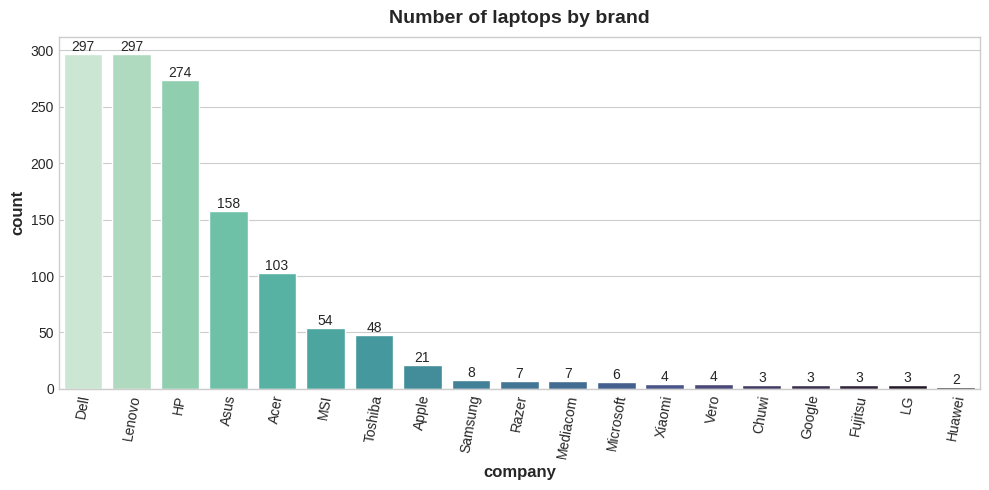

In [ ]:
#visualisasi

fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x='company', data=df, palette='mako_r', order=df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brand')
plt.show()


## What type of laptop is the most frequent?

In [ ]:
df1['typename'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: typename, dtype: int64

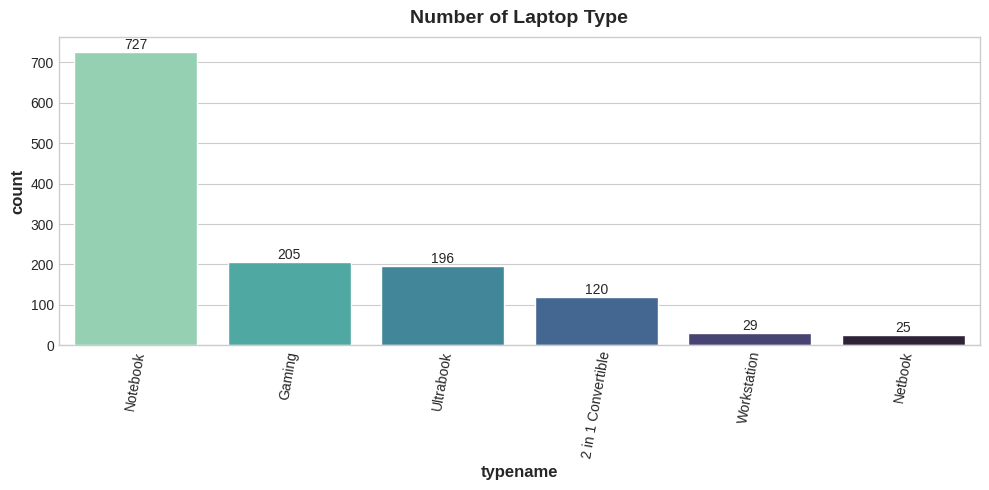

In [ ]:
#visualisasi

fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x='typename', data=df, palette='mako_r', order=df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of Laptop Type')
plt.show()


In [ ]:
print('Most laptops area notebooks, which make {: 2f}% of the total laptops'.format(len(df1[df1['typename'] == 'Notebook'])*100/len(df1)))

Most laptops area notebooks, which make  55.837174% of the total laptops


## Which size is the most popular?

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(KG)        1302 non-null   float64
 9   price_euros       1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        401 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


In [ ]:
df1['inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
10.1      4
15.4      4
12.3      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: inches, dtype: int64

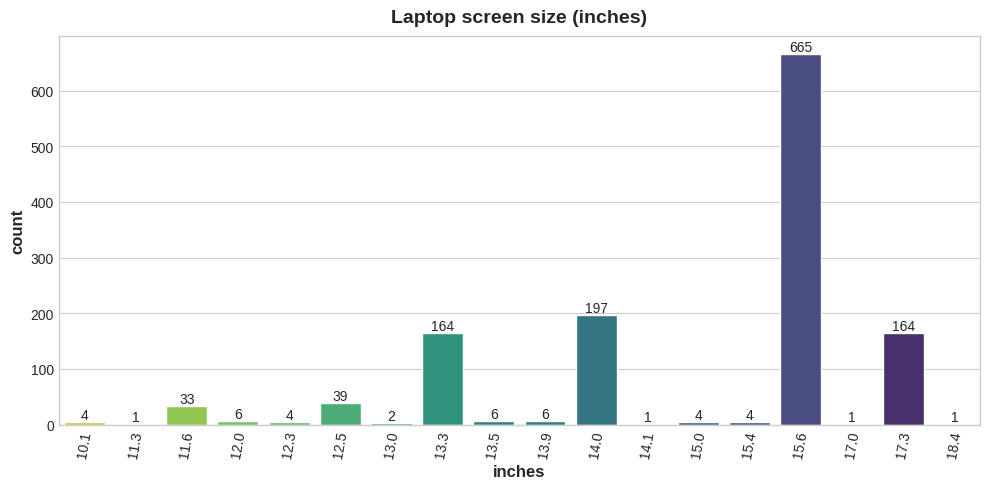

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [ ]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [ ]:
# memberikan informasi hanya 6 pertama atau data tertinggi

inches_list = df['inches'].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

### melakukan cleaning data

In [ ]:
df_clean

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128.0,GBSSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,8.0,128.0,GBFlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,5.0,256.0,GBSSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512.0,GBSSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256.0,GBSSD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,IPSPanel,1.0,5.0,128.0,GBSSD,0.0,NaN,Intel,Intel
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,IPSPanelQuadHD+,1.0,5.0,512.0,GBSSD,0.0,NaN,Intel,Intel
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,NaN,0.0,6.0,64.0,GBFlashStorage,0.0,NaN,Intel,Intel
1300,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,NaN,0.0,5.0,1000.0,GBHDD,0.0,NaN,Intel,AMD


In [ ]:
df_clean=df_clean[df_clean['inches'].isin(inches_list)]

[Text(0, 0, '33'),
 Text(0, 0, '39'),
 Text(0, 0, '164'),
 Text(0, 0, '197'),
 Text(0, 0, '665'),
 Text(0, 0, '164')]

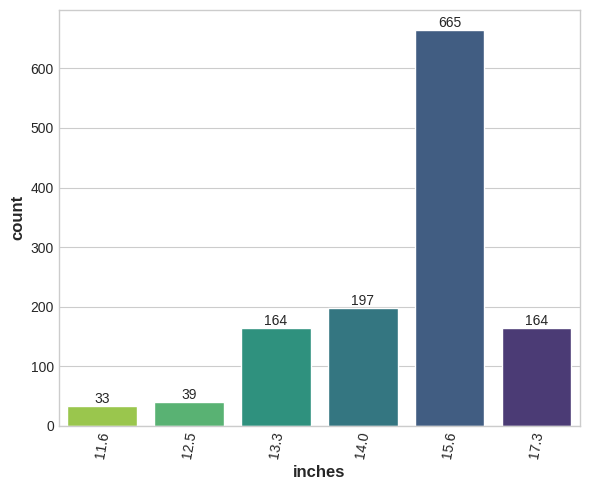

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches', data=df_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])

In [ ]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 40 outliers!


## How is weight distributed among the laptops?

In [ ]:
print(df_clean['weight(KG)'].head(5))

0    1.37
1    1.34
2    1.86
4    1.37
5    2.10
Name: weight(KG), dtype: float64


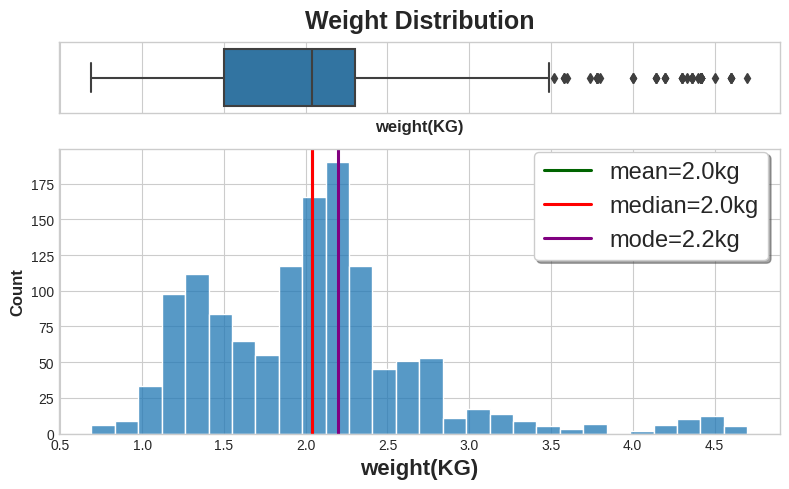

In [ ]:
num_plot(df_clean, 'weight(KG)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

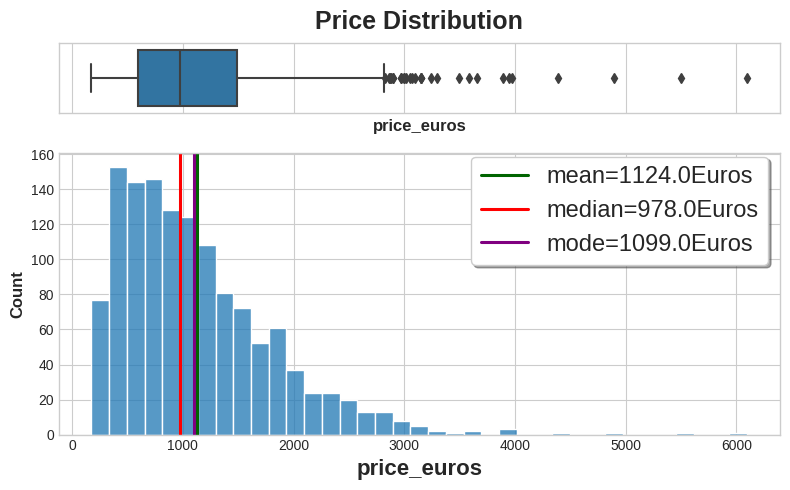

In [ ]:
num_plot(df_clean, 'price_euros', 'Price Distribution','Euros')

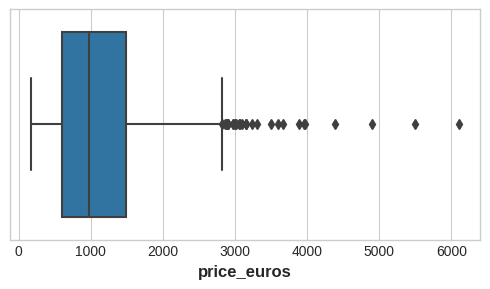

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price_euros', data=df)

In [ ]:
df[df['price_euros'] > 4500]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3840x2160,4KUltraHD,1.0,9.0,1000.0,GBSSD,0.0,NaN,Intel,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,3840x2160,IPSPanel,0.0,1.0,1000.0,GBSSD,0.0,NaN,Intel,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,3840x2160,4KUltraHD,1.0,9.0,512.0,GBSSD,0.0,NaN,Intel,Nvidia


In [ ]:
max_price = df['price_euros'].max()
df[df['price_euros'] == max_price]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3840x2160,4KUltraHD,1.0,9.0,1000.0,GBSSD,0.0,NaN,Intel,Nvidia


## How is RAM distributed among the laptops?

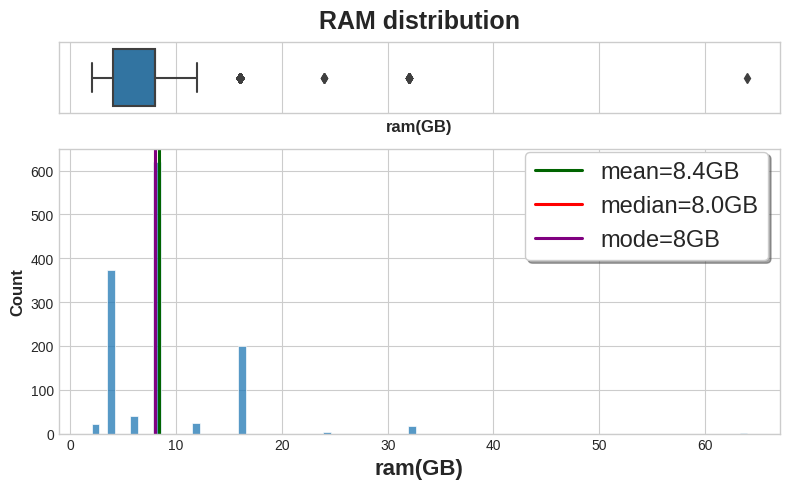

In [ ]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [ ]:
print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 47.54% of the total laptops


## How is CPU frequency distributed among the laptops?

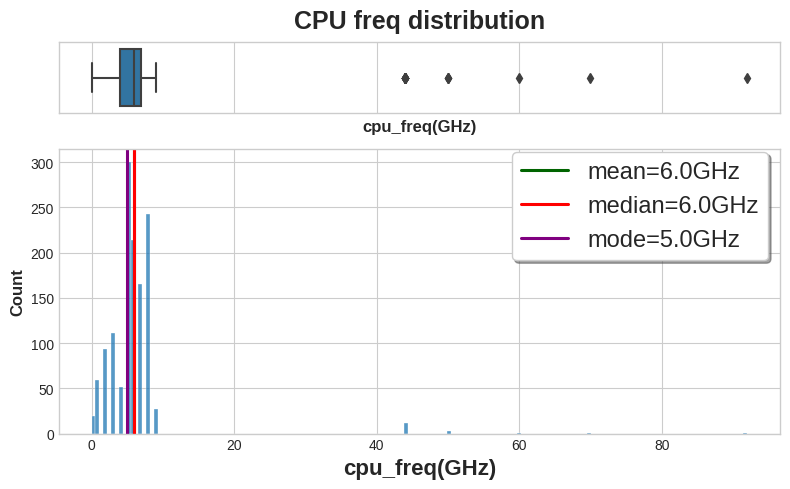

In [ ]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [ ]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 0.0% of the total laptops


## How is Hard Drive capacity distributed among the laptops?

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,3.0,128.0,GBSSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,8.0,128.0,GBFlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,5.0,256.0,GBSSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,7.0,512.0,GBSSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,1.0,256.0,GBSSD,0.0,NaN,Intel,Intel


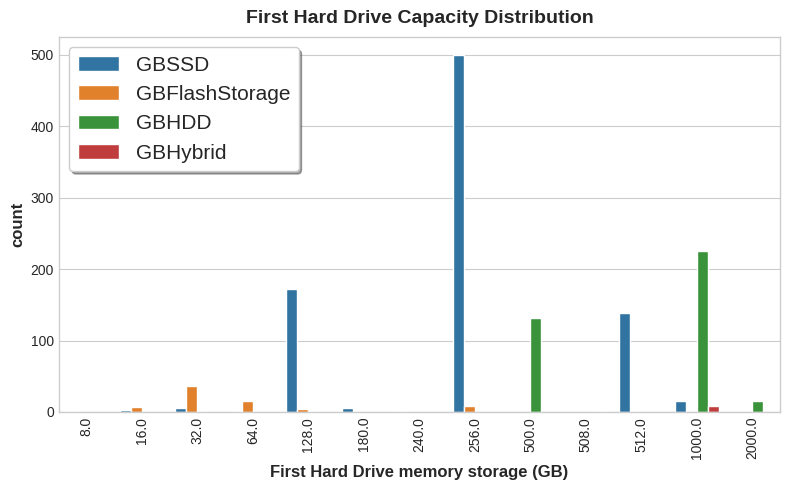

In [ ]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)', data=df, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

In [ ]:
print('Most laptops have a First Hard Drive memory (GB), which make {}% of the total laptops'.format(np.round(len(df[df['memory_1_sto(GB)']==256.0])*100/len(df),2)))

Most laptops have a First Hard Drive memory (GB), which make 39.02% of the total laptops


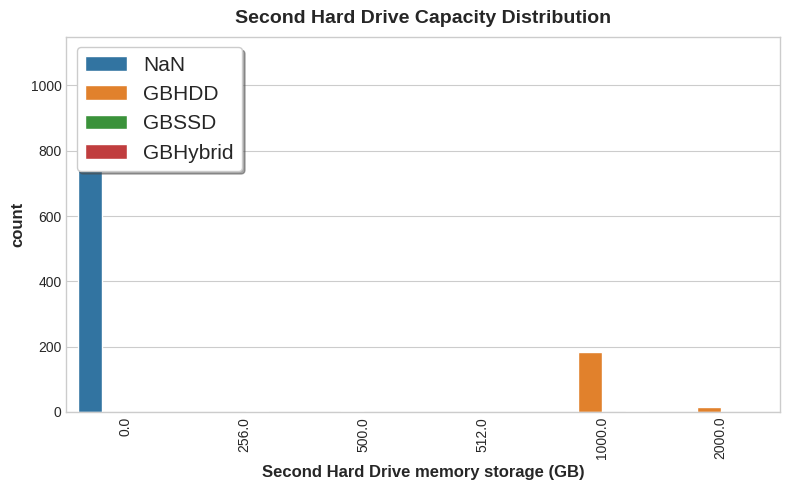

In [ ]:
plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2_sto(GB)', data=df, hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

## Price VS CPU brand by GPU brand

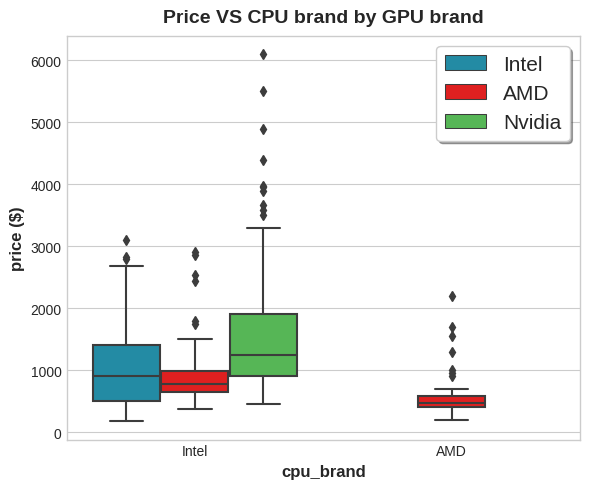

In [ ]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_brand', y='price_euros', data=df, hue='gpu_brand', palette=cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

In [ ]:
df[df['gpu_brand'] == 'Nvidia'].head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(KG),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel Core i7 8550U,16,Nvidia GeForce MX150,Windows 10,1.3,1495.0,1920x1080,NaN,0.0,8.0,512.0,GBSSD,0.0,NaN,Intel,Nvidia
18,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Intel Core i3 7100U,8,Nvidia GeForce 940MX,No OS,2.2,499.0,1920x1080,NaN,0.0,4.0,1000.0,GBHDD,0.0,NaN,Intel,Nvidia
21,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i5 7300HQ,8,Nvidia GeForce GTX 1050,Windows 10,2.5,999.0,1920x1080,IPSPanel,0.0,5.0,128.0,GBSSD,1000.0,GBHDD,Intel,Nvidia
29,HP,ProBook 470,Notebook,17.3,Intel Core i5 8250U,8,Nvidia GeForce 930MX,Windows 10,2.5,896.0,1920x1080,NaN,0.0,6.0,1000.0,GBHDD,0.0,NaN,Intel,Nvidia
39,HP,ProBook 450,Notebook,15.6,Intel Core i5 8250U,8,Nvidia GeForce 930MX,Windows 10,2.1,879.0,1920x1080,NaN,0.0,6.0,256.0,GBSSD,0.0,NaN,Intel,Nvidia


Insights from this plot:

* CPU intel dengan GPU Nvidia memiliki  range harga yang lebih dari yang lain
* CPU intel memiliki 3 GPU brand yaitu : Intel, AMD, Nvidia
* CPU_brand dengan AMD memilki 1 GPU_brand yaitu AMD sendiri.
* GPU_brand untuk AMD memiliki harga yang lebih murah baik di CPU_brand intel dan CPU_brand AMD

## Which are the TOP 15 most common GPUs?

In [ ]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()


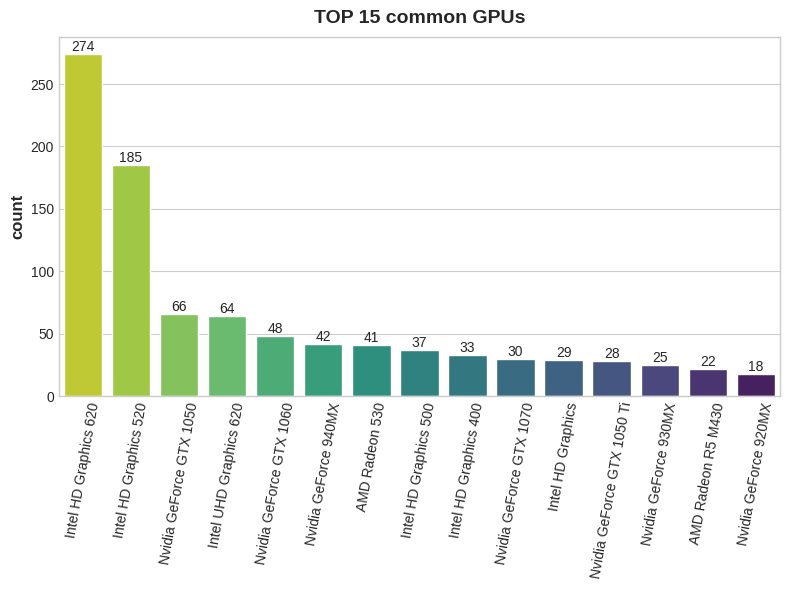

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

## Which are the TOP 15 most common CPUs?

In [ ]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

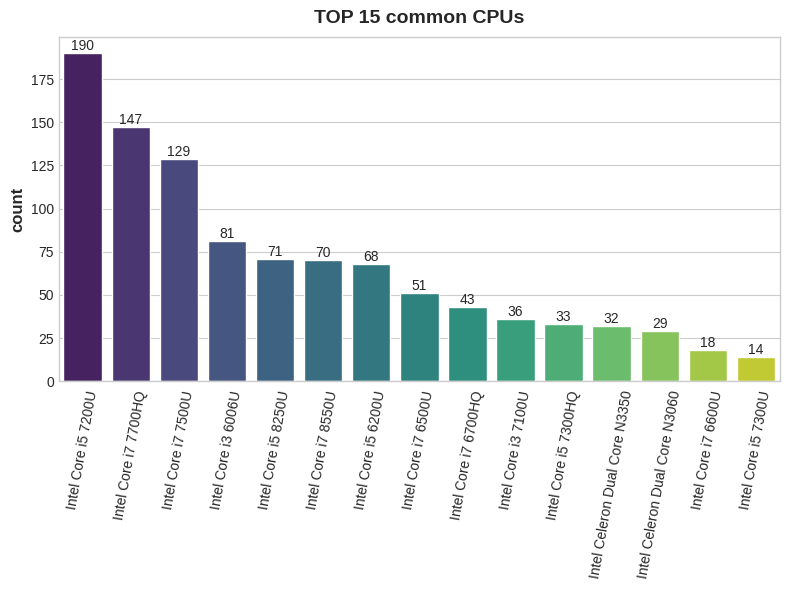

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu', data=df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

## What is the average price of laptops by company?

In [ ]:
company_list = df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

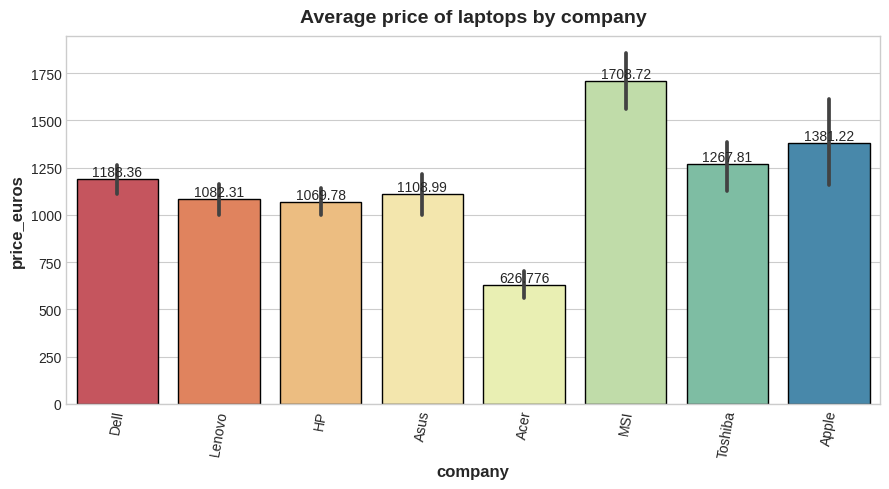

In [ ]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price_euros', data=df_clean[df_clean['company'].isin(company_list)],
                order=company_list,
                palette='Spectral',
                #ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show();

Insights:
* Terdapat 8 merek laptop yang memiliki nilai harga tertinggi
* Laptop dengan merek MSI merupakan laptop yang memiliki harga rata-rata tertinggi
* Laptop Acer memiliki harga rata-rata terendah.